<a href="https://colab.research.google.com/github/jaworskamalgorzata99-GIT/Maching-Learning-Bootcamp/blob/main/unsupervised/dimensionality_reduction/05_tsne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import bibliotek

In [2]:
import pandas as pd
import numpy as np
from keras.datasets import mnist
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

np.random.seed(42)

###Załadowanie danych

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


###Wizualizacja danych

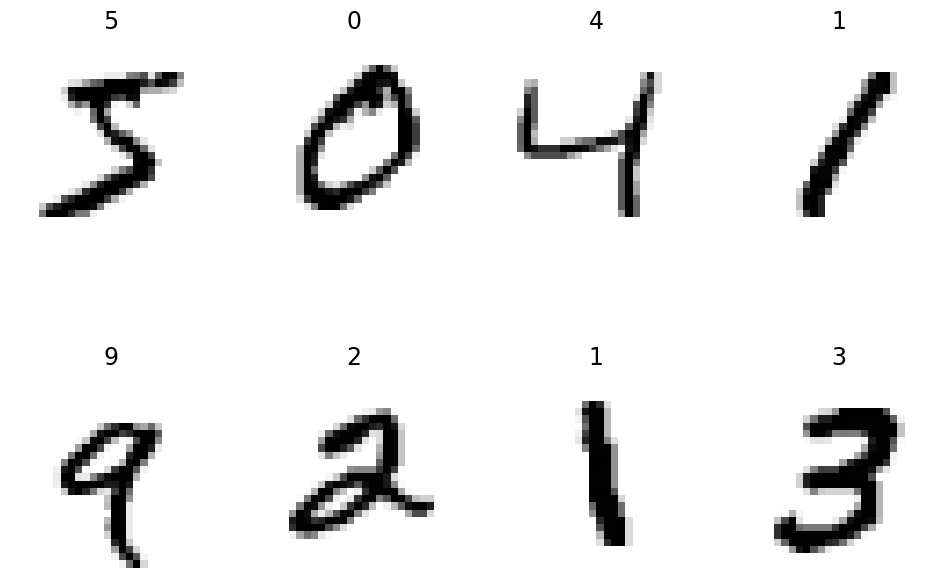

In [4]:
plt.figure(figsize=(12,8))
for i in range(8):
  plt.subplot(240 + i +1)
  plt.imshow(X_train[i], cmap='gray_r')
  plt.title(y_train[i], color='black', fontsize=17)
  plt.axis('off')
plt.show()

### Ograniczenie i wypłaszczenie danych

In [5]:
X_train = X_train[:10000]
y_train = y_train[:10000]
X_train = X_train.reshape(-1, 28 * 28)
X_train.shape

(10000, 784)

###Standaryzacja

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

###PCA

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_std)
X_train_pca.shape

(10000, 3)

Wyjaśniona wariancja

In [8]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results

,explained_variance_ratio,cumulative,component
0,0.061640,0.061640,1
1,0.043662,0.105302,2
2,0.040458,0.145760,3


In [9]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout = go.Layout(title='PCA - 3 components', width=950, template='plotly_dark'))
fig.show()

In [10]:
X_train_pca_df = pd.DataFrame(data=np.c_[X_train_pca, y_train], columns=['pca_1','pca_2', 'pca_3', 'class'])
X_train_pca_df['class'] = X_train_pca_df['class'].astype(str)
X_train_pca_df.head()

,pca_1,pca_2,pca_3,class
0,-0.997658,-4.651824,-0.740503,5.0
1,8.682762,-7.124047,-4.195260,0.0
2,2.439044,10.567199,-4.057029,4.0
3,-7.291481,-3.686028,3.064818,1.0
4,-4.791476,4.498186,-5.603754,9.0


In [11]:
px.scatter(X_train_pca_df, x='pca_1', y='pca_2', color='class', opacity=0.5, width=950,
           title='PCA - 2 components', template = 'plotly_dark')

In [12]:
px.scatter_3d(X_train_pca_df, x='pca_1', y='pca_2', z='pca_3', color='class',
              opacity=0.5, width=950, height=700, title='PCA - 3 components', template = 'plotly_dark')

###t-SNE

verbose=1 → w trakcie trenowania będzie wypisywać komunikaty o postępie.

In [13]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1)
X_train_tsne = tsne.fit_transform(X_train_std)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.003s...
[t-SNE] Computed neighbors for 10000 samples in 4.332s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.770266
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.030869
[t-SNE] KL divergence after 1000 iterations: 1.700457


In [14]:
X_train_tsne_df = pd.DataFrame(data = np.c_[X_train_tsne, y_train], columns=['tsne_1', 'tsne_2', 'class'])
X_train_tsne_df['class'] = X_train_tsne_df['class'].astype(str)
X_train_tsne_df

,tsne_1,tsne_2,class
0,0.127470,-36.885952,5.0
1,72.388863,-6.300170,0.0
2,2.609154,77.464775,4.0
3,-62.889400,-7.453016,1.0
4,-22.134279,71.404045,9.0
...,...,...,...
9995,-17.985134,-57.193039,5.0
9996,-3.647027,-12.602730,8.0
9997,33.634087,-51.845943,6.0
9998,-15.232891,53.628300,9.0


Wizualizacja t-SNE

In [15]:
px.scatter(X_train_tsne_df, x='tsne_1', y='tsne_2', color='class', opacity=0.5, width=950, height=700,
           template='plotly_dark', title='TSNE - 2 components')

###Porównanie PCA vs. t-SNE

px.scatter automatycznie tworzy obiekt Figure (fig1).

Ten obiekt zawiera listę data – czyli traces (warstwy wykresu).

Każda unikalna wartość w kolumnie color='class' (np. cyfry 0–9) → dostaje osobny trace.
Dlatego dla zbioru MNIST masz 10 klas → w fig1.data znajdziesz 10 wykresów (scatter trace), po jednym dla każdej cyfry.

fig1['data'] → to lista wszystkich trace’ów (np. [trace_0, trace_1, ..., trace_9]).

fig1['data'][i] → wybierasz konkretny trace odpowiadający klasie nr i

In [16]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, subplot_titles=['PCA','t-SNE'], horizontal_spacing=0.03)

fig1 = px.scatter(X_train_pca_df, x='pca_1', y='pca_2', color='class', opacity=0.5)
fig2 = px.scatter(X_train_tsne_df, x='tsne_1', y='tsne_2', color='class', opacity=0.5)

# wyrysowanie skupisk wszystkich cyfr dlatego 10
for i in range(0,10):
  fig.add_trace(fig1['data'][i], row=1, col=1)
  fig.add_trace(fig2['data'][i], row=1, col=2)
fig.update_layout(width=950, showlegend=False, template='plotly_dark')
fig.show()

###50 komponentów

###Połączenie PCA z T-SNE

In [17]:
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_std)
X_train_pca.shape

(10000, 50)

In [19]:
tsne = TSNE(n_components=2, verbose=1)
X_train_tsne_50 = tsne.fit_transform(X_train_pca)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...
[t-SNE] Computed neighbors for 10000 samples in 0.880s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 3.900588
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.057739
[t-SNE] KL divergence after 1000 iterations: 1.645519


In [20]:
X_train_tsne_50_df = pd.DataFrame(data=np.c_[X_train_tsne_50, y_train], columns=['tsne_1', 'tsne_2', 'class'])
X_train_tsne_50_df['class'] = X_train_tsne_50_df['class'].astype(str)
X_train_tsne_50_df

,tsne_1,tsne_2,class
0,10.381764,-42.427216,5.0
1,79.252991,0.832890,0.0
2,24.963652,46.886581,4.0
3,-82.037102,3.058082,1.0
4,-10.102269,59.231350,9.0
...,...,...,...
9995,-4.289180,-55.316795,5.0
9996,-11.296463,-5.849341,8.0
9997,29.016788,-65.046013,6.0
9998,-12.035789,54.927536,9.0


In [21]:
px.scatter(X_train_tsne_50_df, x='tsne_1', y='tsne_2', color='class', opacity=0.5, width=950, height=700,
           template='plotly_dark', title='t-SNE - 2 components after PCA')

In [22]:
fig=make_subplots(rows=1, cols=3, subplot_titles=['PCA','t-SNE','t-SNE after PCA'], horizontal_spacing=0.03)

fig1 = px.scatter(X_train_pca_df, x='pca_1', y='pca_2', color='class', opacity=0.5)
fig2 = px.scatter(X_train_tsne_df, x='tsne_1', y='tsne_2', color='class', opacity=0.5)
fig3 = px.scatter(X_train_tsne_50_df, x='tsne_1', y='tsne_2', color='class', opacity=0.5)

for i in range(0,10):
  fig.add_trace(fig1['data'][i], row=1, col=1)
  fig.add_trace(fig2['data'][i], row=1, col=2)
  fig.add_trace(fig3['data'][i], row=1, col=3)
fig.update_layout(width=950, height=450, showlegend=False, template='plotly_dark')
fig.show()

3 components

In [23]:
tsne = TSNE(n_components=3, verbose=1)
X_train_tsne = tsne.fit_transform(X_train_pca)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...
[t-SNE] Computed neighbors for 10000 samples in 0.989s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 3.900588
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.244820
[t-SNE] KL divergence after 1000 iterations: 1.446199


In [24]:
X_train_tsne_df = pd.DataFrame(data=np.c_[X_train_tsne, y_train], columns=['tsne_1','tsne_2','tsne_3','class'])
X_train_tsne_df['class'] = X_train_tsne_df['class'].astype(str)
X_train_tsne_df

,tsne_1,tsne_2,tsne_3,class
0,-2.758767,-16.402733,-1.604528,5.0
1,23.228128,-5.813576,-1.463976,0.0
2,12.589007,13.048906,-10.038733,4.0
3,-16.107548,-10.677886,0.326077,1.0
4,-3.671940,15.791528,-6.306924,9.0
...,...,...,...,...
9995,6.856869,-11.753971,-8.953551,5.0
9996,1.062793,1.361696,-4.799304,8.0
9997,7.254593,-11.091029,19.751127,6.0
9998,-3.672712,12.767337,-6.727241,9.0


In [25]:
px.scatter_3d(X_train_tsne_df, x='tsne_1',y='tsne_2',z='tsne_3', color='class', opacity=0.5, width=950, height=700,
              template='plotly_dark', title='TSNE - 3 components')

In [26]:
TSNE?